<a href="https://colab.research.google.com/github/sagareligar/Q-learning_CartPole_Problem/blob/master/Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# inspired by https://github.com/nikhilpodila/Reinforcement-Learning-Inverted-Pendulum

import numpy as np
import matplotlib.pyplot as plt
import time
import random 
t0=time.clock() # start timer for finding simulation time

# Mathematical model of the system
def cart_pole(force,theta,thetaDot,x,xDot):
  g=9.8
  M=1
  m=0.1
  total_mass = M+m
  length=0.5
  polemass_length=(m*length)
  tau=0.02
  fourthird=1.333
  temp = (force + polemass_length*thetaDot*thetaDot*np.sin(theta))/total_mass
  # thetaacc = (g*np.sin(theta) - np.cos(theta)*temp)/(length*(fourthird - (m*np.cos(theta)*np.cos(theta))/(total_mass)))
  thetaacc = (g*np.sin(theta) - np.cos(theta)*temp)/(length*(fourthird - m*np.cos(theta)*np.cos(theta)/total_mass))

  xacc = temp - polemass_length *thetaacc*np.cos(theta)/total_mass

  xNext = x + tau*xDot
  xDotNext = xDot + tau*xacc
  thetaNext = theta + tau*thetaDot
  thetaDotNext = thetaDot + tau*thetaacc
  
  return [thetaNext,thetaDotNext,thetaacc,xNext,xDotNext]



In [2]:
#boxes

def getbox(theta,thetaDot,x,xDot):



  theta = np.rad2deg(theta)
  thetaDot = np.rad2deg(thetaDot)
  # print(theta)
  # print(thetaDot)
  if (x < -2.4 or x > 2.4  or theta<-12 or theta > 12):
    box=162
  else:

    if (theta<-6 and theta>=-12):
      thetaBucket = 0
    elif(theta<-1 and theta>=-6):
      thetaBucket = 1

    elif(theta<0 and theta>=-1):
      thetaBucket = 2

    elif(theta<1 and theta>=0):
      thetaBucket = 3

    elif(theta<6 and theta>=1):
      thetaBucket = 4

    elif(theta<=12 and theta>=6):
      thetaBucket = 5



    if (x<-0.8 and x>=-2.4):
      xBucket = 0
    elif (x<=0.8 and x>=-0.8):
      xBucket = 1

    elif (x<=2.4 and x>0.8):
      xBucket = 2



    if(xDot<-0.5):
      xDotBucket = 0
    elif(xDot>=-0.5 and xDot<=0.5):
      xDotBucket = 1
    else:
      xDotBucket = 2
      

    if(thetaDot<-50):
      thetaDotBucket = 0
    elif(thetaDot>=-50 and thetaDot<=50):
      thetaDotBucket = 1
    else:
      thetaDotBucket = 2

    box = np.ravel_multi_index((thetaBucket, thetaDotBucket,xBucket,xDotBucket), dims=(6,3, 3,3), order='F')
  return box
    





Trail 1 was  9 steps
Trail 2 was  10 steps
Trail 3 was  9 steps
Trail 4 was  27 steps
Trail 5 was  48 steps
Trail 6 was  48 steps
Trail 7 was  119 steps
Trail 8 was  43 steps
Trail 9 was  79 steps
Trail 10 was  10 steps
Trail 11 was  55 steps
Trail 12 was  36 steps
Trail 13 was  100 steps
Trail 14 was  34 steps
Trail 15 was  78 steps
Trail 16 was  39 steps
Trail 17 was  15 steps
Trail 18 was  15 steps
Trail 19 was  13 steps
Trail 20 was  15 steps
Trail 21 was  40 steps
Trail 22 was  29 steps
Trail 23 was  10 steps
Trail 24 was  18 steps
Trail 25 was  138 steps
Trail 26 was  15 steps
Trail 27 was  36 steps
Trail 28 was  50 steps
Trail 29 was  113 steps
Trail 30 was  14 steps
Trail 31 was  156 steps
Trail 32 was  158 steps
Trail 33 was  133 steps
Trail 34 was  135 steps
Trail 35 was  143 steps
Trail 36 was  144 steps
Trail 37 was  143 steps
Trail 38 was  146 steps
Trail 39 was  154 steps
Trail 40 was  202 steps
Trail 41 was  154 steps
Trail 42 was  163 steps
Trail 43 was  230 steps
Trail

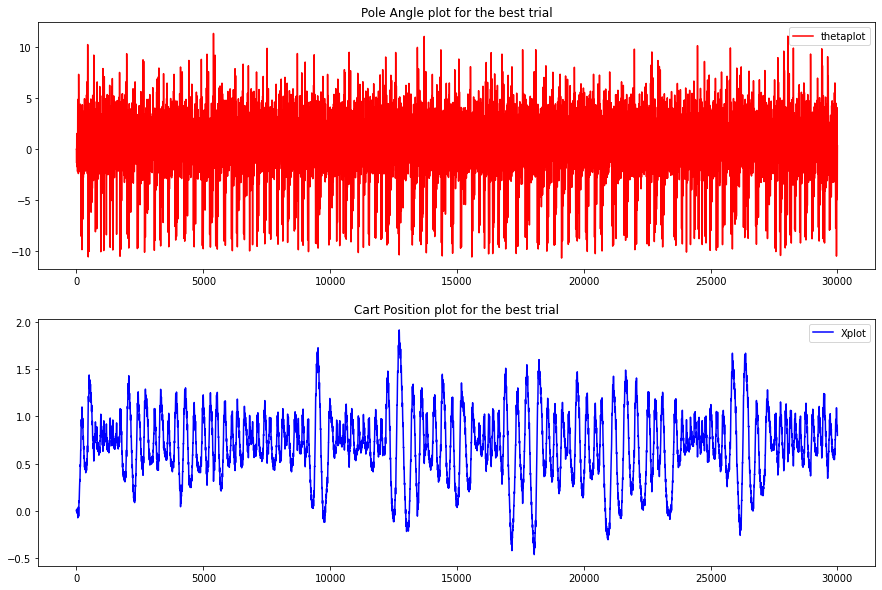

In [22]:
#Q-learning
NUM_BOXES = 163         # Number of states
ALPHA = 0.5            # Learning rate parameter
GAMMA = 0.999           # Discount factor for future reinforcements
Q = np.zeros((NUM_BOXES,2),dtype=float)  # State-Action Values
action = [10, -10]       # Action space (Force on cart)
MAX_FAILURES = 1000     # Maximum number of Failures allowed
MAX_STEPS = 30000      # Maximum number of steps (time) until Task success
epsilon = 0          # Epsilon value for epsilon-greedy strategy of action selection

# Initializing required parameters
steps = 0
failures = 0
thetaPlot = []
xPlot = []

#Pendulum state initialization
theta = 0
thetaDot = 0
x = 0
xDot = 0

# Get the index of the first state (Tabular method)
box = getbox(theta,thetaDot,x,xDot)

while(steps<=MAX_STEPS and failures<=MAX_FAILURES):


  steps = steps + 1

  if(np.random.random()>epsilon):
    #actionMax = max(Q[box,:])
    actionMax = np.argmax(Q[box,:])
    currentAction = action[actionMax]
  else:
    #currentAction = datasample(action,1)
    currentAction= random.sample(action, 1)[0]

  actionIndex = action.index(currentAction)  # index of chosen action
  [thetaNext,thetaDotNext,thetaacc,xNext,xDotNext] = cart_pole(currentAction,theta,thetaDot,x,xDot)
  
  thetaPlot.append((thetaNext*180)/(np.pi))
  xPlot.append(xNext)
  
  newBox = getbox(thetaNext,thetaDotNext,xNext,xDotNext)

  theta = thetaNext
  thetaDot = thetaDotNext
  x = xNext
  xDot = xDotNext

  if newBox == 162:
    r=-1
    Q[newBox,:] = 0
    # print(thetaPlot)
    # print("Hello")


    thetaPlot = [0]
    xPlot = [0]
    theta = 0
    thetaDot = 0
    x = 0
    xDot = 0

    newBox = getbox(theta,thetaDot,x,xDot)

    failures = failures + 1
    
    print("Trail {0} was  {1} steps".format(failures,steps))

    steps = 0

  else:
    r=0
 
  Q[box,actionIndex] = Q[box,actionIndex] +  ALPHA*(r + GAMMA*np.max(Q[newBox,:]) - Q[box,actionIndex])

  box=newBox

if(failures == (MAX_FAILURES+1)):
  print("Pole not balanced.")
else:
  print("Pole balanced successfully")
  print(thetaPlot)
  print("Theta")
  print(xPlot)
  print("xPlot")

  plt.rcParams["figure.figsize"] = (15,10) # resizes figures for viewing
  plt.figure()
  # plt.subplot(3,1,1)
  # plt.plot(failures+1,steps,'r',label='S per F')
  # plt.title('Number of steps taken to reach each Failure')
  # plt.legend()

  plt.subplot(2,1,1)
  length_thetatplot=range(len(thetaPlot))
  plt.plot(length_thetatplot,thetaPlot,'r',label='thetaplot')
  plt.title("Pole Angle plot for the best trial")
  plt.legend()

  plt.subplot(2,1,2)
  length_xplot=range(len(xPlot))
  plt.plot(length_xplot,xPlot,'b',label='Xplot')
  plt.title("Cart Position plot for the best trial")
  plt.legend()


t1=time.clock()
total=t1-t0
print("Simulation time is {:.3f} seconds.\n" .format(total))